<a href="https://colab.research.google.com/github/DShcherbak/University_Labs/blob/main/semester-7/neural-networks/labs/lab-2/seminar_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Підготовка

In [2]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
# переведемо графіки в svg
%config InlineBackend.figure_format = 'svg'

#увеличим дефолтний размер график
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
import pandas as pd

In [3]:
from google.colab import files
files.upload()

Saving howpop_train.csv - howpop_train.csv.csv to howpop_train.csv - howpop_train.csv.csv


In [4]:
df = pd.read_csv('howpop_train.csv - howpop_train.csv.csv')
df.dropna()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,1.627469,1.300050,1.167375
5,https://habrahabr.ru/post/18295/,habrahabr.ru,18295,2008-01-02 16:14:00,@lvea,develop,False,3171,Mobile2.0 Всеобщая доступность,22,1,192,9.0,2.0,-0.950075,-0.825149,0.016555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134128,https://habrahabr.ru/post/314078/,habrahabr.ru,314078,2016-10-31 19:54:00,@semen_grinshtein,management,False,13832,Как Windows NT стала «убийцей» Novell NetWare OS,31,32,16700,40.0,0.0,0.981449,-0.382134,0.797726
134129,https://habrahabr.ru/post/314040/,habrahabr.ru,314040,2016-10-31 20:01:00,@MACROSCOP,develop,False,8493,Как найти вектор развития программного продукт...,12,38,2900,6.0,0.0,-1.082758,-0.204400,0.114351
134130,https://habrahabr.ru/post/314082/,habrahabr.ru,314082,2016-10-31 20:29:00,@alexeev_n,management,False,4529,Почему в очередной раз проваливается внедрение...,30,36,4500,10.0,14.0,-0.563889,-0.260262,0.773280
134131,https://habrahabr.ru/post/313960/,habrahabr.ru,313960,2016-10-31 21:08:00,@Nuteralie,management,False,7104,Большое количество людей в опенспейсе мешает с...,82,44,18500,36.0,4.0,1.103055,-0.051925,1.519625


In [5]:
df.head().transpose()

,0,1,2,3,4
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/,https://habrahabr.ru/post/18291/,https://geektimes.ru/post/18294/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru
post_id,18284,18285,18286,18291,18294
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00,2008-01-02 14:34:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo
flow,develop,design,design,design,NaN
polling,False,False,False,False,False
content_len,4305,7344,8431,5662,3706
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone
comments,0,1,47,102,230


In [6]:
data = df[[x for x in df.columns if '_lognorm' not in x]]
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [7]:
data['published'] = pd.to_datetime(data.published)
data.head().transpose()

,0,1,2,3,4
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/,https://habrahabr.ru/post/18291/,https://geektimes.ru/post/18294/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru
post_id,18284,18285,18286,18291,18294
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00,2008-01-02 14:34:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo
flow,develop,design,design,design,NaN
polling,False,False,False,False,False
content_len,4305,7344,8431,5662,3706
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone
comments,0,1,47,102,230


In [8]:
data['year'] = [d.year for d in data.published]
data['month'] = [d.month for d in data.published]
data['dayofweek'] = [d.isoweekday() for d in data.published]
data['hour'] = [d.hour for d in data.published]

## Завдання 1. 
Найвищі показники публікацій - березень 2015 року

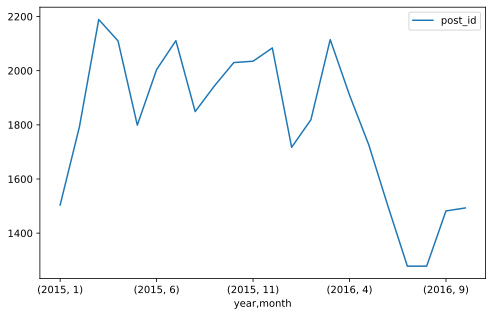

In [10]:
number_publishes = data[['post_id', 'month', 'year']]
number_publishes[number_publishes['year'] > 2014].groupby(['year', 'month']).count().plot()

## Завдання 2
1. Так, вівторок, субота та неділя виділяються з іншої картини 
2. Так, На Хабрі завжди більше статей ніж на Гіктаймсі
3. Так, по суботах на Гіктаймсі та Хабрі публікують приблизно однакову кількість статей 




In [14]:
march15 = data[(data['month'] == 3) & (data['year'] == 2015)]
march15.head().transpose()

,97666,97667,97668,97669,97670
url,https://habrahabr.ru/post/251783/,https://habrahabr.ru/company/kolibrios/blog/23...,https://habrahabr.ru/post/286286/,https://habrahabr.ru/post/251347/,https://habrahabr.ru/post/251765/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,251783,239033,286286,251347,251765
published,2015-03-01 00:00:00,2015-03-01 00:09:00,2015-03-01 07:13:00,2015-03-01 07:52:00,2015-03-01 10:30:00
author,@SLY_G,NaN,@semen_grinshtein,@Makeman,@Doomer3D
flow,develop,develop,misc,develop,develop
polling,False,False,False,False,False
content_len,49647,8581,1883,48658,40374
title,Введение в разработку слайд-шоу на JavaScript,Дайджест KolibriOS #7: как мы зиму перезимовали,"9 марта компания Apple сделает то, что не дела...",Context Model Pattern via Aero Framework,Заполнение текстовых шаблонов данными на основ...
comments,6,14,12,6,4


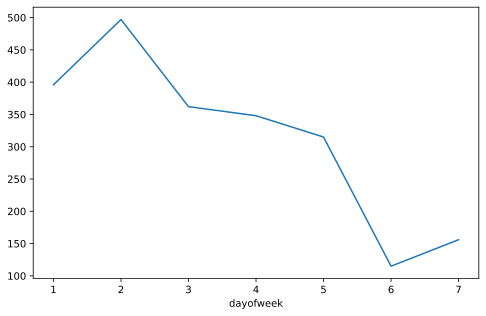

In [12]:
march15.groupby('dayofweek')['post_id'].count().plot()

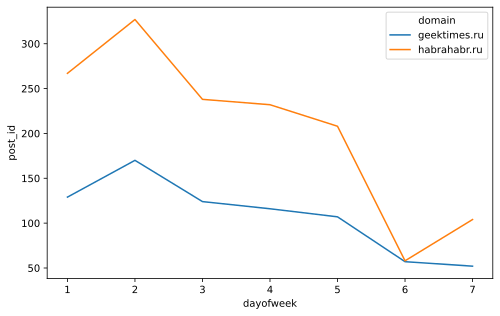

In [13]:
plot = march15[['post_id', 'domain', 'dayofweek']].groupby(['dayofweek', 'domain']).count()
sns.lineplot(x='dayofweek', y='post_id', data=plot, hue='domain')

## Завдання 3
1. Так, найбільше переглядів обирають статті, опубліковані о 12 годині дня

2. Ні, найбільше коментарів отримують пости о 13 годині

3. Ні, статті, опубліковані о 6 годині ранку не найбільше переглядів
4. Ні, найбільшу кількість коментарів в історії Гіктаймс зібрала стаття опублікована о 2й ночі 
5. Так, на Хабрі денні статті коментують частіше за нічні






###   3.1. Так, найбільше переглядів обирають статті, опубліковані о 12 годині дня
###   3.3. Ні, статті, опубліковані о 6 годині ранку не найбільше переглядів






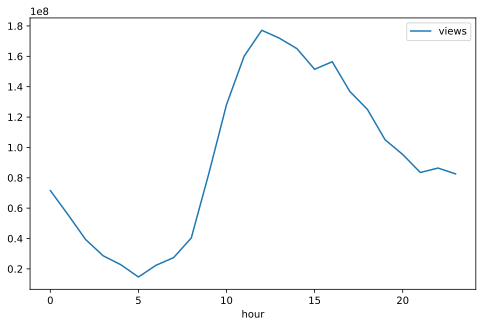

In [15]:
data[['hour', 'views']].groupby(['hour']).sum().plot()

### 3.2. Ні, найбільше коментарів отримують пости о 13 годині

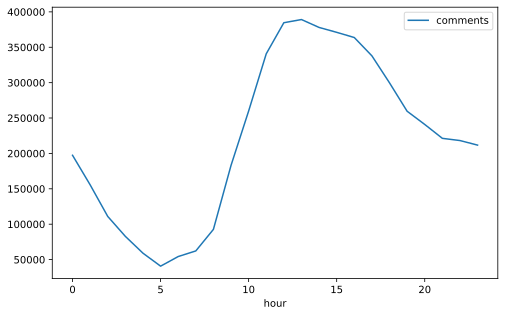

In [16]:
data[['hour', 'comments']].groupby(['hour']).sum().plot()

### 3.4. Ні, найбільшу кількість коментарів в історії Гіктаймс зібрала стаття опублікована о 2й ночі 

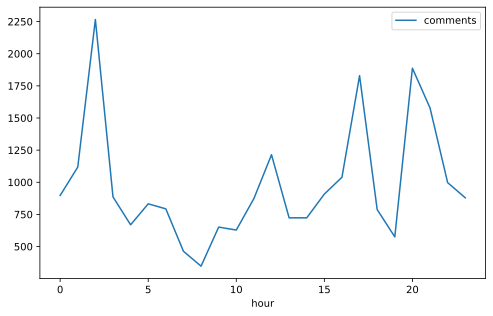

In [17]:
data[data['domain'] == 'geektimes.ru'][['hour', 'comments']].groupby(['hour']).max().plot()

### 3.5. Так, на Хабрі денні статті коментують частіше за нічні

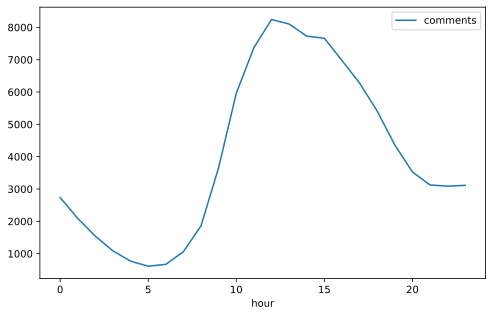

In [18]:
data[data['domain'] == 'habrahabr.ru'][['hour', 'comments']].groupby(['hour']).count().plot()

## Завдання 4


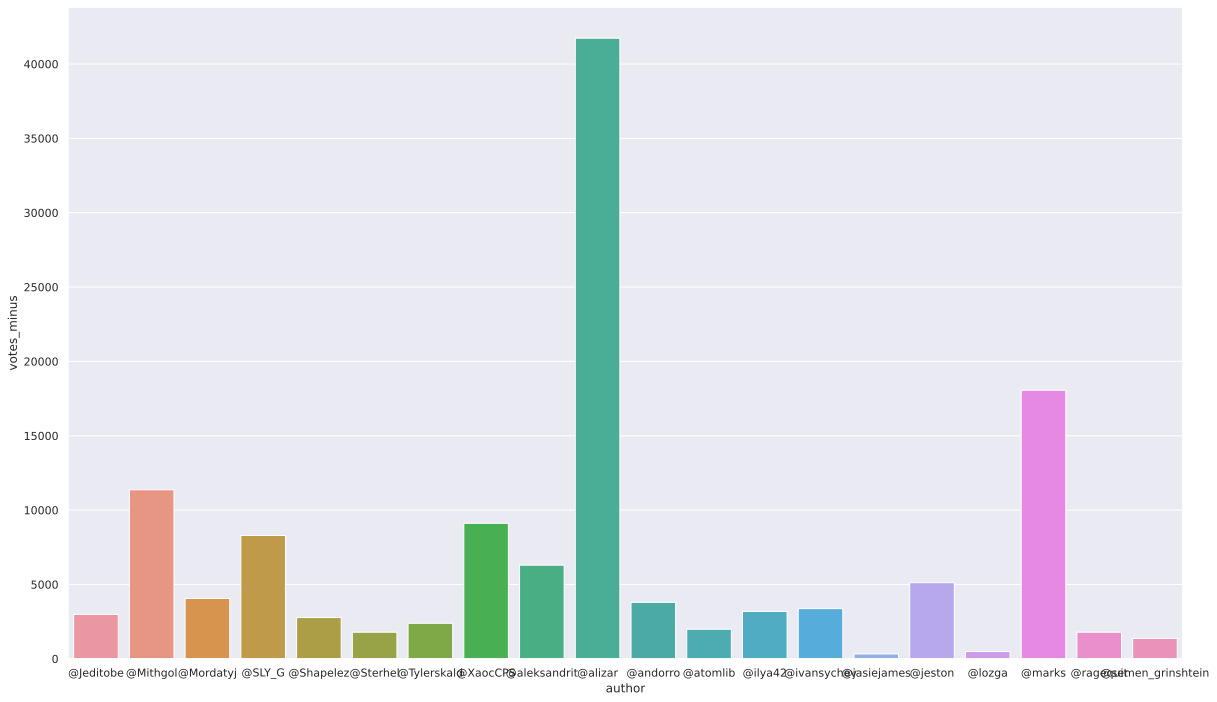

In [39]:
top20 = data[['author', 'post_id', 'votes_minus']].groupby('author').count().sort_values('post_id', ascending=False).head(20)
top20_author = top20.index.values
sns.set(rc={'figure.figsize':(20,12)})
plot = sns.barplot(data=data[data['author'].isin(top20_author)][['author', 'votes_minus']].groupby('author').sum().reset_index(), 
                    x='author',
                    y= 'votes_minus')

